<a href="https://colab.research.google.com/github/B0544218/thesis/blob/main/predict_LS_score_2%E6%96%B0_SBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 7.6 MB/s eta 0:00:00


In [2]:
# feature_srl_strategy_.csv
!gdown 1RHHxSGW6hCed2qQWpbuM8CJ9_Rt0qOVs

Downloading...
From: https://drive.google.com/uc?id=1RHHxSGW6hCed2qQWpbuM8CJ9_Rt0qOVs
To: /content/feature_srl_strategy_.csv
100% 39.7k/39.7k [00:00<00:00, 35.5MB/s]


In [3]:
# feature_srl_motivation_.csv
!gdown 1kv_wZoRJb50N54eu9CunndbslDM3nv-i

Downloading...
From: https://drive.google.com/uc?id=1kv_wZoRJb50N54eu9CunndbslDM3nv-i
To: /content/feature_srl_motivation_.csv
100% 37.3k/37.3k [00:00<00:00, 32.1MB/s]


In [4]:
# feature_srl_strategy.csv
!gdown 1mTGFS2lxbbCxY5koJ666oq47vlSEyQqN


Downloading...
From: https://drive.google.com/uc?id=1mTGFS2lxbbCxY5koJ666oq47vlSEyQqN
To: /content/feature_srl_strategy.csv
100% 35.1k/35.1k [00:00<00:00, 44.1MB/s]


In [5]:
# feature_srl_motivation.csv
!gdown 1G7SN3hJw7GePJfj0cMpJo1D9yDv1CIvH

Downloading...
From: https://drive.google.com/uc?id=1G7SN3hJw7GePJfj0cMpJo1D9yDv1CIvH
To: /content/feature_srl_motivation.csv
100% 32.5k/32.5k [00:00<00:00, 28.2MB/s]


In [6]:
import pandas as pd
srl_motivation_feature = pd.read_csv("feature_srl_motivation.csv")
srl_strategy_feature = pd.read_csv("feature_srl_strategy.csv")
srl_feature = pd.merge(srl_motivation_feature, srl_strategy_feature, on='username')

In [7]:
srl_motivation_feature
# 少5個

,score,code_paste,code_copy,code_speed,notebook_open,tree_open,codeLength,notebookPath,vs_class_-1,vs_class_1,...,br_class_0,br_class_-1,br_class_1,Motivatoin_Intrinsic_Goal_Orientation,Motivatoin_Extrinsic_Goal_Orientation,Motivatoin_Task_Value,Motivatoin_Control_Beliefs,Motivatoin_SelfEfficacy_for_Learning_and_Performance,Motivatoin_Test_Anxiety,username
0,72,440.0,340.0,4396.0,233.0,90.0,9293.31,127.0,2.0,12.0,...,7.0,0.0,9.0,3.50,4.50,5.00,3.25,3.00,4.6,105302302
1,94,84.0,35.0,667.0,43.0,19.0,3016.83,27.0,7.0,3.0,...,8.0,1.0,7.0,3.00,2.50,3.00,3.00,5.00,1.4,105403018
2,64,107.0,79.0,1175.0,39.0,39.0,11281.92,25.0,2.0,7.0,...,6.0,1.0,9.0,3.00,3.25,3.00,2.50,3.00,3.0,105707001
3,75,236.0,84.0,2148.0,94.0,45.0,6203.39,64.0,2.0,10.0,...,8.0,0.0,8.0,3.25,3.50,3.33,2.25,2.50,4.0,106101002
4,67,297.0,210.0,3060.0,141.0,69.0,9259.00,54.0,3.0,8.0,...,7.0,2.0,7.0,3.50,3.75,3.17,2.25,2.38,4.6,106101008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,90,850.0,718.0,5576.0,372.0,69.0,5818.63,164.0,1.0,14.0,...,8.0,1.0,7.0,4.25,3.25,4.50,3.75,3.12,3.2,110801007
295,7,29.0,16.0,282.0,67.0,14.0,235.76,24.0,12.0,2.0,...,5.0,10.0,1.0,4.25,4.50,4.83,4.25,4.00,3.2,111101001
296,38,622.0,463.0,2451.0,242.0,98.0,2196.87,110.0,4.0,8.0,...,11.0,2.0,3.0,3.25,3.75,3.50,4.00,2.50,3.6,111101004
297,70,476.0,387.0,3796.0,188.0,63.0,3521.78,69.0,1.0,13.0,...,13.0,0.0,3.0,4.25,3.25,3.33,3.00,2.50,3.4,111101006


In [8]:
srl_strategy_feature
# 少8個

,score,code_paste,code_copy,code_speed,notebook_open,tree_open,codeLength,notebookPath,vs_class_-1,vs_class_1,...,Strategy_Rehearsal,Strategy_Elaboration,Strategy_Marker_and_Memo_quality,Strategy_Critical_Thinking,Strategy_Metacognitive_SelfRegulation,Strategy_Time_and_Study_Environment,Strategy_Effort_Regulation,Strategy_Peer_Learning,Strategy_Help_Seeking,username
0,72,440.0,340.0,4396.0,233.0,90.0,9293.31,127.0,2.0,12.0,...,4.00,4.00,4.00,4.0,3.92,3.75,2.25,1.00,3.75,105302302
1,94,84.0,35.0,667.0,43.0,19.0,3016.83,27.0,7.0,3.0,...,2.50,3.50,3.00,4.2,2.33,2.25,1.50,1.00,2.50,105403018
2,64,107.0,79.0,1175.0,39.0,39.0,11281.92,25.0,2.0,7.0,...,4.00,3.50,3.50,2.6,3.42,3.25,3.75,1.33,3.25,105707001
3,75,236.0,84.0,2148.0,94.0,45.0,6203.39,64.0,2.0,10.0,...,3.75,3.00,3.75,3.0,3.17,3.38,3.75,4.00,4.00,106101002
4,67,297.0,210.0,3060.0,141.0,69.0,9259.00,54.0,3.0,8.0,...,3.75,3.33,3.25,2.8,3.67,3.62,3.25,4.33,3.75,106101008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,7,29.0,16.0,282.0,67.0,14.0,235.76,24.0,12.0,2.0,...,3.75,4.67,4.25,3.8,4.17,3.75,4.00,4.00,3.50,111101001
282,38,622.0,463.0,2451.0,242.0,98.0,2196.87,110.0,4.0,8.0,...,3.75,3.50,3.75,3.6,3.50,3.38,3.00,3.00,3.75,111101004
283,70,476.0,387.0,3796.0,188.0,63.0,3521.78,69.0,1.0,13.0,...,3.75,3.83,4.25,4.4,3.17,3.62,2.75,2.00,3.25,111101006
284,32,166.0,115.0,1166.0,189.0,37.0,1283.77,87.0,7.0,7.0,...,3.00,3.00,3.50,3.0,2.42,3.00,3.50,2.00,3.50,111101017


## feature_motivation(train_test_split)

In [9]:
import pandas as pd
df = pd.read_csv("feature_srl_motivation.csv")
all_column = df.drop(columns=['score', 'code_paste', 'code_copy', 'code_speed', 'notebook_open', 'tree_open', 'codeLength', 'notebookPath'])
learning_strategies = ['vs_class_1', 'vs_class_-1', 'vs_class_0', 'br_class_1', 'br_class_-1', 'br_class_0']

In [10]:
df2 = pd.read_csv("feature_srl_strategy.csv")
df2

,score,code_paste,code_copy,code_speed,notebook_open,tree_open,codeLength,notebookPath,vs_class_-1,vs_class_1,...,Strategy_Rehearsal,Strategy_Elaboration,Strategy_Marker_and_Memo_quality,Strategy_Critical_Thinking,Strategy_Metacognitive_SelfRegulation,Strategy_Time_and_Study_Environment,Strategy_Effort_Regulation,Strategy_Peer_Learning,Strategy_Help_Seeking,username
0,72,440.0,340.0,4396.0,233.0,90.0,9293.31,127.0,2.0,12.0,...,4.00,4.00,4.00,4.0,3.92,3.75,2.25,1.00,3.75,105302302
1,94,84.0,35.0,667.0,43.0,19.0,3016.83,27.0,7.0,3.0,...,2.50,3.50,3.00,4.2,2.33,2.25,1.50,1.00,2.50,105403018
2,64,107.0,79.0,1175.0,39.0,39.0,11281.92,25.0,2.0,7.0,...,4.00,3.50,3.50,2.6,3.42,3.25,3.75,1.33,3.25,105707001
3,75,236.0,84.0,2148.0,94.0,45.0,6203.39,64.0,2.0,10.0,...,3.75,3.00,3.75,3.0,3.17,3.38,3.75,4.00,4.00,106101002
4,67,297.0,210.0,3060.0,141.0,69.0,9259.00,54.0,3.0,8.0,...,3.75,3.33,3.25,2.8,3.67,3.62,3.25,4.33,3.75,106101008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,7,29.0,16.0,282.0,67.0,14.0,235.76,24.0,12.0,2.0,...,3.75,4.67,4.25,3.8,4.17,3.75,4.00,4.00,3.50,111101001
282,38,622.0,463.0,2451.0,242.0,98.0,2196.87,110.0,4.0,8.0,...,3.75,3.50,3.75,3.6,3.50,3.38,3.00,3.00,3.75,111101004
283,70,476.0,387.0,3796.0,188.0,63.0,3521.78,69.0,1.0,13.0,...,3.75,3.83,4.25,4.4,3.17,3.62,2.75,2.00,3.25,111101006
284,32,166.0,115.0,1166.0,189.0,37.0,1283.77,87.0,7.0,7.0,...,3.00,3.00,3.50,3.0,2.42,3.00,3.50,2.00,3.50,111101017


In [11]:
all = pd.merge(df, df2, on='username')
all = all.drop(columns=['username'])
all

,score_x,code_paste_x,code_copy_x,code_speed_x,notebook_open_x,tree_open_x,codeLength_x,notebookPath_x,vs_class_-1_x,vs_class_1_x,...,br_class_1_y,Strategy_Rehearsal,Strategy_Elaboration,Strategy_Marker_and_Memo_quality,Strategy_Critical_Thinking,Strategy_Metacognitive_SelfRegulation,Strategy_Time_and_Study_Environment,Strategy_Effort_Regulation,Strategy_Peer_Learning,Strategy_Help_Seeking
0,72,440.0,340.0,4396.0,233.0,90.0,9293.31,127.0,2.0,12.0,...,9.0,4.00,4.00,4.00,4.0,3.92,3.75,2.25,1.00,3.75
1,94,84.0,35.0,667.0,43.0,19.0,3016.83,27.0,7.0,3.0,...,7.0,2.50,3.50,3.00,4.2,2.33,2.25,1.50,1.00,2.50
2,64,107.0,79.0,1175.0,39.0,39.0,11281.92,25.0,2.0,7.0,...,9.0,4.00,3.50,3.50,2.6,3.42,3.25,3.75,1.33,3.25
3,75,236.0,84.0,2148.0,94.0,45.0,6203.39,64.0,2.0,10.0,...,8.0,3.75,3.00,3.75,3.0,3.17,3.38,3.75,4.00,4.00
4,67,297.0,210.0,3060.0,141.0,69.0,9259.00,54.0,3.0,8.0,...,7.0,3.75,3.33,3.25,2.8,3.67,3.62,3.25,4.33,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,90,850.0,718.0,5576.0,372.0,69.0,5818.63,164.0,1.0,14.0,...,7.0,4.25,4.17,4.50,3.8,4.00,3.88,4.00,3.33,3.50
254,7,29.0,16.0,282.0,67.0,14.0,235.76,24.0,12.0,2.0,...,1.0,3.75,4.67,4.25,3.8,4.17,3.75,4.00,4.00,3.50
255,38,622.0,463.0,2451.0,242.0,98.0,2196.87,110.0,4.0,8.0,...,3.0,3.75,3.50,3.75,3.6,3.50,3.38,3.00,3.00,3.75
256,70,476.0,387.0,3796.0,188.0,63.0,3521.78,69.0,1.0,13.0,...,3.0,3.75,3.83,4.25,4.4,3.17,3.62,2.75,2.00,3.25


In [12]:
all['vs_class_1_x']

0      12.0
1       3.0
2       7.0
3      10.0
4       8.0
       ... 
253    14.0
254     2.0
255     8.0
256    13.0
257     7.0
Name: vs_class_1_x, Length: 258, dtype: float64

In [13]:
all['vs_class_1_x'].mean()

9.2984496124031

In [14]:
all['vs_class_1_x'].quantile(0.25)

7.0

### 分2群(0.25，不能用8weeks來區分，因為有些學習策略本來就很少人使用)
```
告訴學生說
大家知道人格分析其實就只是蒐集很多不同個性人的意見，然後去歸類說你的個性如何或是適合什麼樣的職業，給大家參考。
那未來想說，大家先前填寫的SRL動機策略問卷，以及使用的行為去做分析調查，讓大家可以參考跟你使用相似行為進行學習的人，其個動機和策略大概都呈現什麼樣的分布
```

In [15]:
def draw_summary_plot(col):
  import matplotlib.pyplot as plt
  import numpy as np
  shap.initjs()

  # 各取40筆資料
  # train
  # index_0 = train[train[col] == 0].index[:40]
  # index_1 = train[train[col] == 1].index[:40]
  # index_0 = train[train[col] == 0].index
  # index_1 = train[train[col] == 1].index
  # test
  index_0 = test[test[col] == 0].index
  index_1 = test[test[col] == 1].index

  index_concat = list(index_0) + list(index_1)


  # inputdata = train.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

  # inputdata = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
  inputdata = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

  inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
  # shape values
  # explainer = shap.KernelExplainer(svm.predict, inputdata.loc[index_concat,:])
  explainer = shap.Explainer(svm.predict, inputdata.loc[index_concat,:])
  shap_values = explainer(inputdata.loc[index_concat,:])

  feature_names = [
    a + ": " + str(b) for a,b in zip(inputdata.columns, np.abs(shap_values.values).mean(0).round(2))
  ]
  # 整體
  # shap.summary_plot(inputdata)
  shap.summary_plot(shap_values, inputdata.loc[index_concat,:], feature_names=feature_names, max_display=9) # 不存圖
  # shap.summary_plot(shap_values, inputdata.loc[index_concat,:], show=False) # 才可以存圖
  plt.savefig(col + '_summary.png')

  # local
  # for i in range(len(index_concat)):
  #   shap.force_plot(explainer.expected_value, shap_values[i,:], feature_names=inputdata.columns, matplotlib=True, show=True, text_rotation=0)
  #   # 有字(但是擠成一坨)
  #   plt.savefig(col + '/' + 'local_' + str(i) + '.png', dpi=100)


In [16]:
def draw_force_plot(col):
  import matplotlib.pyplot as plt
  shap.initjs()

  # 各取40筆資料
  index_0 = test[test[col] == 0]
  index_1 = test[test[col] == 1]
  index_concat = list(index_0) + list(index_1)
  # inputdata = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
  inputdata = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
  inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
  # shape values
  # explainer = shap.KernelExplainer(svm.predict, inputdata.loc[index_concat,:])
  explainer = shap.Explainer(svm.predict, inputdata)
  shap_values = explainer(inputdata)
  # local
  shap.plots.force(shap_values, show=False)
  plt.savefig(col + '_force.png')

In [17]:
all['new_vs_1'] = 0
all['new_vs_0'] = 0
all['new_br_1'] = 0
all['new_br_0'] = 0

all.loc[all['vs_class_1_x'] > all['vs_class_1_x'].quantile(0.25), 'new_vs_1'] = 1
all.loc[all['vs_class_0_x'] > all['vs_class_0_x'].quantile(0.25), 'new_vs_0'] = 1
all.loc[all['br_class_1_x'] > all['br_class_1_x'].quantile(0.25), 'new_br_1'] = 1
all.loc[all['br_class_0_x'] > all['br_class_0_x'].quantile(0.25), 'new_br_0'] = 1

# all.loc[all['vs_class_1_x'] <= all['vs_class_1_x'].quantile(0.25), 'new_vs_1'] = 0
from collections import Counter
print(Counter(all['new_vs_1']))
print(Counter(all['new_vs_0']))
print(Counter(all['new_br_1']))
print(Counter(all['new_br_0']))


# df = all[['Motivatoin_Intrinsic_Goal_Orientation', 'Motivatoin_Extrinsic_Goal_Orientation', 'Motivatoin_Task_Value', 'Motivatoin_Control_Beliefs', 'Motivatoin_SelfEfficacy_for_Learning_and_Performance', 'Motivatoin_Test_Anxiety',
#   'Strategy_Rehearsal', 'Strategy_Elaboration', 'Strategy_Marker_and_Memo_quality', 'Strategy_Critical_Thinking', 'Strategy_Metacognitive_SelfRegulation', 'Strategy_Time_and_Study_Environment', 'Strategy_Effort_Regulation', 'Strategy_Peer_Learning', 'Strategy_Help_Seeking',
#   'vs_1_group_y', 'vs_0_group_y', 'br_1_group_y', 'br_0_group_y',
#   'new_vs_1', 'new_vs_0', 'new_br_1', 'new_br_0']]

df = all[['Motivatoin_Intrinsic_Goal_Orientation', 'Motivatoin_Extrinsic_Goal_Orientation', 'Motivatoin_Task_Value', 'Motivatoin_Control_Beliefs', 'Motivatoin_SelfEfficacy_for_Learning_and_Performance', 'Motivatoin_Test_Anxiety',
  'Strategy_Rehearsal', 'Strategy_Elaboration', 'Strategy_Marker_and_Memo_quality', 'Strategy_Critical_Thinking', 'Strategy_Metacognitive_SelfRegulation', 'Strategy_Time_and_Study_Environment', 'Strategy_Effort_Regulation', 'Strategy_Peer_Learning', 'Strategy_Help_Seeking',
  'new_vs_1', 'new_vs_0', 'new_br_1', 'new_br_0']]

Counter({1: 182, 0: 76})
Counter({1: 181, 0: 77})
Counter({1: 187, 0: 71})
Counter({1: 187, 0: 71})


In [18]:
# df[df.isna().any(axis=1)]
# 依據column補0
for col in ['Motivatoin_Intrinsic_Goal_Orientation', 'Motivatoin_Extrinsic_Goal_Orientation', 'Motivatoin_Task_Value', 'Motivatoin_Control_Beliefs', 'Motivatoin_SelfEfficacy_for_Learning_and_Performance', 'Motivatoin_Test_Anxiety', 'Strategy_Rehearsal', 'Strategy_Elaboration', 'Strategy_Marker_and_Memo_quality', 'Strategy_Critical_Thinking', 'Strategy_Metacognitive_SelfRegulation', 'Strategy_Time_and_Study_Environment', 'Strategy_Effort_Regulation', 'Strategy_Peer_Learning', 'Strategy_Help_Seeking']:
  df[col] = df[col].fillna(df[col].mean())



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
!mkdir new_vs_0

In [41]:
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

new_vs_0
11 3 5 33
Accuracy:  0.8461538461538461
Precision:  0.9166666666666666
Recall:  0.868421052631579
F1:  0.891891891891892


Permutation explainer: 53it [00:31,  1.31it/s]


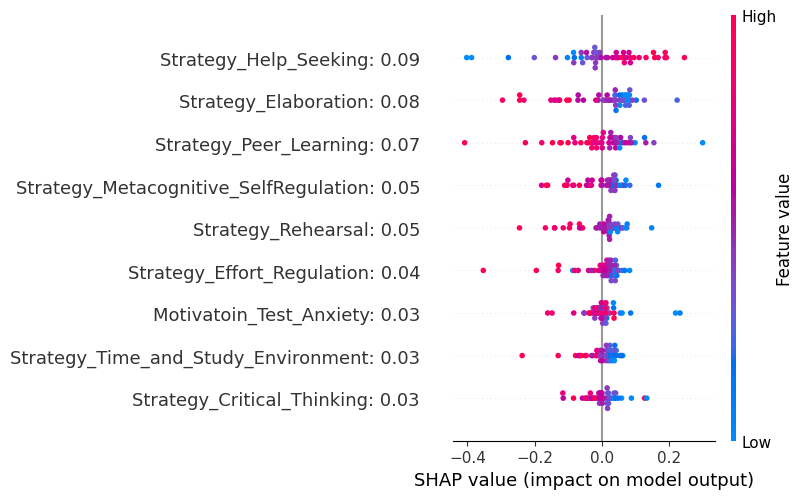

<Figure size 640x480 with 0 Axes>

In [44]:
from sklearn.model_selection import train_test_split
from collections import Counter
import random
# 5 460
# for i in range(0, 600):
train, test = train_test_split(df, test_size=0.2, random_state=460, shuffle=True, stratify=df['new_vs_0'])
# 下面是自創的(對train['new_vs_0'] == 1而言，under sampling)
df_0_len = len(train[train['new_vs_0'] == 0])
tmp_0 = train[train['new_vs_0'] == 0][:df_0_len]
tmp_1 = train[train['new_vs_0'] == 1][:round(df_0_len*1.5)]
train = pd.concat([tmp_0, tmp_1])
#
# X_train = train.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
# Y_train = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
X_train = train.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
Y_train = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

# 這是有效問卷，但是有nan值，我也不知道怎辦，所以先補問卷的平均值
# X_train = X_train.apply(lambda row: row.fillna(row.mean()), axis=1)
# Y_train = Y_train.apply(lambda row: row.fillna(row.mean()), axis=1)


group = ['new_vs_0']

for col in group:
  from sklearn import svm
  import matplotlib.pyplot as plt

  # 分類
  svm = svm.SVC(gamma='scale', random_state=random.seed(234), decision_function_shape='ovo')
  svm.fit(X_train.to_numpy(), train[col])
  pred = svm.predict(Y_train.to_numpy())

  from sklearn.metrics import confusion_matrix
  tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()
  Accuracy = (tp+tn)/(tp+fp+fn+tn)
  Precision = tp/(tp+fp)
  Recall = tp/(tp+fn)
  # if fn<7:
  #   print(i)
  print(col)
  print(tn, fp, fn, tp)
  print('Accuracy: ', Accuracy)
  print('Precision: ', Precision)
  print('Recall: ', Recall)
  print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    draw_summary_plot(col)


  ## draw_force_plot(col)

In [52]:
import matplotlib.pyplot as plt

# 各取40筆資料
index_0 = test[test[col] == 0]
index_1 = test[test[col] == 1]
index_concat = list(index_0) + list(index_1)
# inputdata = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
inputdata = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
# shape values
explainer = shap.Explainer(svm.predict, inputdata)
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  shap_values = explainer(inputdata)
# local
shap.initjs()
shap.plots.force(shap_values)

Permutation explainer: 53it [00:44,  1.13s/it]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train.to_numpy(), train[col])
pred = rfc.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print(col)
print('random forest')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1234)
lr.fit(X_train.to_numpy(), train[col])
pred = lr.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('logistic regression')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=1234)
dt.fit(X_train.to_numpy(), train[col])
pred = dt.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('decision tree')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train.to_numpy(), train[col])
pred = knn.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('knn')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1234)
clf.fit(X_train.to_numpy(), train[col])
pred = clf.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('neural network')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

new_vs_0
random forest
7 6 8 31
Accuracy:  0.7307692307692307
Precision:  0.8378378378378378
Recall:  0.7948717948717948
F1:  0.8157894736842105
logistic regression
9 8 6 29
Accuracy:  0.7307692307692307
Precision:  0.7837837837837838
Recall:  0.8285714285714286
F1:  0.8055555555555556
decision tree
6 12 9 25
Accuracy:  0.5961538461538461
Precision:  0.6756756756756757
Recall:  0.7352941176470589
F1:  0.7042253521126761
knn
12 23 3 14
Accuracy:  0.5
Precision:  0.3783783783783784
Recall:  0.8235294117647058
F1:  0.5185185185185185
neural network
10 12 5 25
Accuracy:  0.6730769230769231
Precision:  0.6756756756756757
Recall:  0.8333333333333334
F1:  0.746268656716418


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


In [ ]:
!mkdir new_vs_1

new_vs_1
8 6 7 31
Accuracy:  0.75
Precision:  0.8378378378378378
Recall:  0.8157894736842105
F1:  0.8266666666666667


Permutation explainer: 53it [00:25,  1.31it/s]


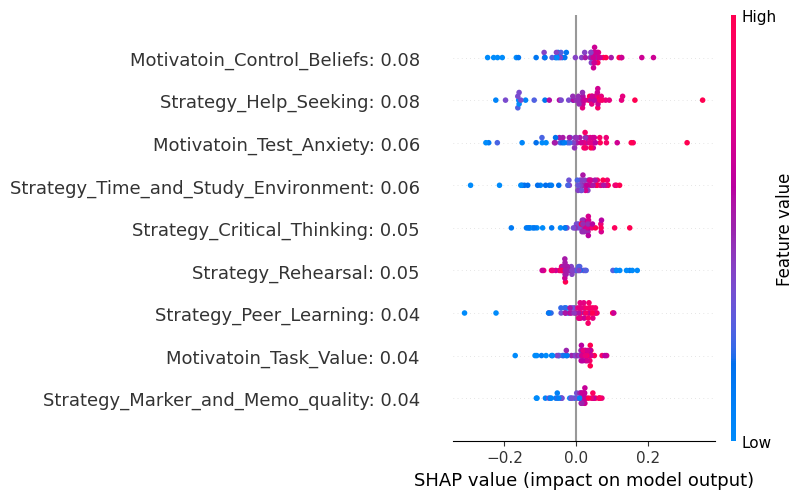

<Figure size 640x480 with 0 Axes>

In [58]:
from sklearn.model_selection import train_test_split
from collections import Counter
import random
# 66 373 3559
# for i in range(2000, 4000):
train, test = train_test_split(df, test_size=0.2, random_state=3559, shuffle=True, stratify=df['new_vs_1'])
# 下面是自創的(對train['new_vs_1'] == 1而言，under sampling)
df_0_len = len(train[train['new_vs_1'] == 0])
tmp_0 = train[train['new_vs_1'] == 0][:df_0_len]
tmp_1 = train[train['new_vs_1'] == 1][:round(df_0_len*1.5)]
train = pd.concat([tmp_0, tmp_1])
#
# X_train = train.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
# Y_train = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
X_train = train.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
Y_train = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
# 這是有效問卷，但是有nan值，我也不知道怎辦，所以先補問卷的平均值
# X_train = X_train.apply(lambda row: row.fillna(row.mean()), axis=1)
# Y_train = Y_train.apply(lambda row: row.fillna(row.mean()), axis=1)
group = ['new_vs_1']

for col in group:
  from sklearn import svm
  import matplotlib.pyplot as plt

  # 分類
  svm = svm.SVC(gamma='scale', probability=True, random_state=random.seed(234))
  svm.fit(X_train.to_numpy(), train[col])
  pred = svm.predict(Y_train.to_numpy())

  from sklearn.metrics import confusion_matrix
  tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()
  
  Accuracy = (tp+tn)/(tp+fp+fn+tn)
  Precision = tp/(tp+fp)
  Recall = tp/(tp+fn)
  # if fn<8:
  #   print(i)
  print(col)
  print(tn, fp, fn, tp)
  print('Accuracy: ', Accuracy)
  print('Precision: ', Precision)
  print('Recall: ', Recall)
  print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    draw_summary_plot(col)


In [55]:
import matplotlib.pyplot as plt

# 各取40筆資料
index_0 = test[test[col] == 0]
index_1 = test[test[col] == 1]
index_concat = list(index_0) + list(index_1)
# inputdata = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
inputdata = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
# shape values
explainer = shap.Explainer(svm.predict, inputdata)
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  shap_values = explainer(inputdata)
# local
shap.initjs()
shap.plots.force(shap_values)

Permutation explainer: 53it [00:32,  1.31it/s]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train.to_numpy(), train[col])
pred = rfc.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print(col)
print('random forest')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1234)
lr.fit(X_train.to_numpy(), train[col])
pred = lr.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('logistic regression')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=1234)
dt.fit(X_train.to_numpy(), train[col])
pred = dt.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('decision tree')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train.to_numpy(), train[col])
pred = knn.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('knn')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1234)
clf.fit(X_train.to_numpy(), train[col])
pred = clf.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('neural network')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

In [ ]:
!mkdir new_br_0

new_br_0
7 3 7 35
Accuracy:  0.8076923076923077
Precision:  0.9210526315789473
Recall:  0.8333333333333334
F1:  0.875


Permutation explainer: 53it [00:23,  1.63it/s]


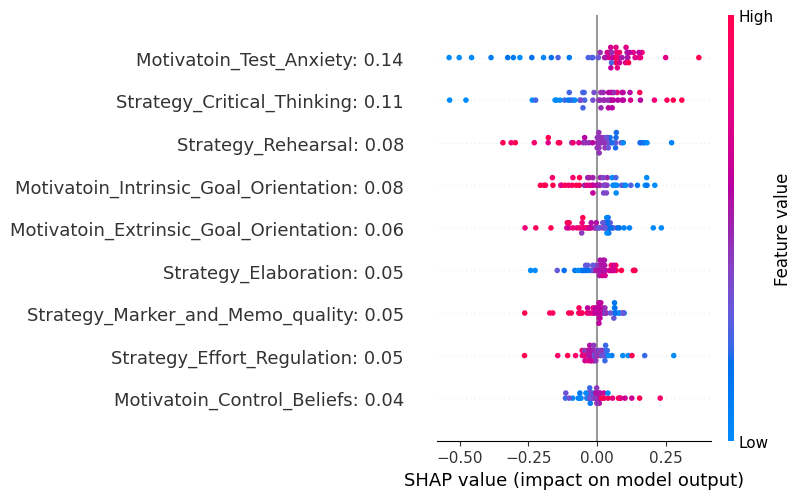

<Figure size 640x480 with 0 Axes>

In [68]:
# BR另外看train test (先記住，new_br_0值為0的數量比較少，所以以他為基準去under sampling)

from sklearn.model_selection import train_test_split
from collections import Counter
import random
# random_state=659 2419 4027 4114
# for i in range(0,5000):
train, test = train_test_split(df, test_size=0.2, random_state=4027, shuffle=True, stratify=df['new_br_0'])
# 下面是自創的(對train['new_br_0'] == 1而言，under sampling)
df_0_len = len(train[train['new_br_0'] == 0])
tmp_0 = train[train['new_br_0'] == 0][:df_0_len]
tmp_1 = train[train['new_br_0'] == 1][:round(df_0_len*1.5)]
train = pd.concat([tmp_0, tmp_1])
# 
# X_train = train.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
# Y_train = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

X_train = train.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
Y_train = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

# 這是有效問卷，但是有nan值，我也不知道怎辦，所以先補問卷的平均值
# X_train = X_train.apply(lambda row: row.fillna(row.mean()), axis=1)
# Y_train = Y_train.apply(lambda row: row.fillna(row.mean()), axis=1)

group = ['new_br_0']

for col in group:
  from sklearn import svm
  import matplotlib.pyplot as plt

  # 分類
  svm = svm.SVC(gamma='scale', random_state=random.seed(234), decision_function_shape='ovo')
  svm.fit(X_train.to_numpy(), train[col])
  pred = svm.predict(Y_train.to_numpy())

  from sklearn.metrics import confusion_matrix
  tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()
  # if fn<8:
  #   print(i)
  Accuracy = (tp+tn)/(tp+fp+fn+tn)
  Precision = tp/(tp+fp)
  Recall = tp/(tp+fn)
  print(col)
  print(tn, fp, fn, tp)
  print('Accuracy: ', Accuracy)
  print('Precision: ', Precision)
  print('Recall: ', Recall)
  print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    draw_summary_plot(col)

In [69]:
import matplotlib.pyplot as plt

# 各取40筆資料
index_0 = test[test[col] == 0]
index_1 = test[test[col] == 1]
index_concat = list(index_0) + list(index_1)
# inputdata = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
inputdata = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
# shape values
explainer = shap.Explainer(svm.predict, inputdata)
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  shap_values = explainer(inputdata)
# local
shap.initjs()
shap.plots.force(shap_values)

Permutation explainer: 53it [00:23,  1.28it/s]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train.to_numpy(), train[col])
pred = rfc.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print(col)
print('random forest')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1234)
lr.fit(X_train.to_numpy(), train[col])
pred = lr.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('logistic regression')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=1234)
dt.fit(X_train.to_numpy(), train[col])
pred = dt.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('decision tree')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train.to_numpy(), train[col])
pred = knn.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('knn')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1234)
clf.fit(X_train.to_numpy(), train[col])
pred = clf.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('neural network')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

In [ ]:
!mkdir new_br_1

new_br_1
8 7 6 31
Accuracy:  0.75
Precision:  0.8157894736842105
Recall:  0.8378378378378378
F1:  0.8266666666666667


Permutation explainer: 53it [00:27,  1.39it/s]


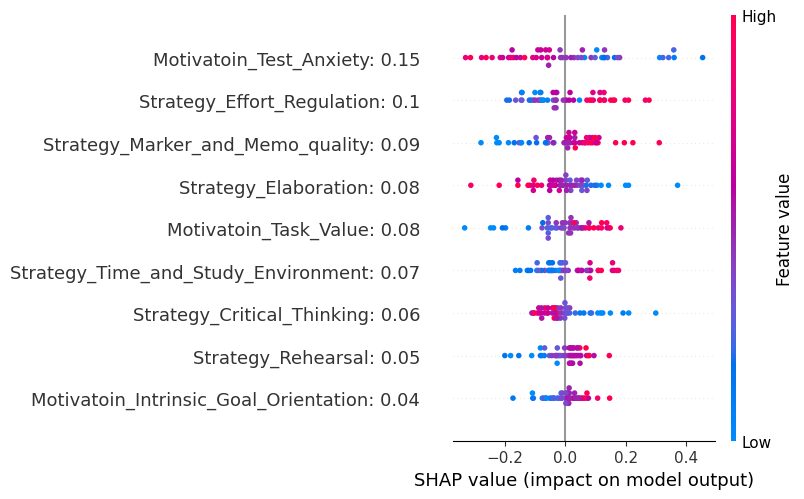

<Figure size 640x480 with 0 Axes>

In [76]:
from sklearn.model_selection import train_test_split
from collections import Counter
import random
# random_state 5781 6210(不好解釋) 7050 8552 8903
# for i in range(5000,10000):
train, test = train_test_split(df, test_size=0.2, random_state=7050, shuffle=True, stratify=df['new_br_1'])

# 下面是自創的(對train['new_br_1'] == 1而言，under sampling)
df_0_len = len(train[train['new_br_1'] == 0])
tmp_0 = train[train['new_br_1'] == 0][:df_0_len]
tmp_1 = train[train['new_br_1'] == 1][:round(df_0_len*1.5)]
train = pd.concat([tmp_0, tmp_1])
#
# X_train = train.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
# Y_train = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
X_train = train.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
Y_train = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

# 這是有效問卷，但是有nan值，我也不知道怎辦，所以先補問卷的平均值
# X_train = X_train.apply(lambda row: row.fillna(row.mean()), axis=1)
# Y_train = Y_train.apply(lambda row: row.fillna(row.mean()), axis=1)


group = ['new_br_1']

for col in group:
  from sklearn import svm
  import matplotlib.pyplot as plt

  # 分類
  svm = svm.SVC(gamma='scale', random_state=random.seed(234), decision_function_shape='ovo')
  svm.fit(X_train.to_numpy(), train[col])
  pred = svm.predict(Y_train.to_numpy())

  from sklearn.metrics import confusion_matrix
  tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()
  
  # if fn<7:
  #   print(i)
  Accuracy = (tp+tn)/(tp+fp+fn+tn)
  Precision = tp/(tp+fp)
  Recall = tp/(tp+fn)
  print(col)
  print(tn, fp, fn, tp)
  print('Accuracy: ', Accuracy)
  print('Precision: ', Precision)
  print('Recall: ', Recall)
  print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    draw_summary_plot(col)

In [ ]:
import matplotlib.pyplot as plt

# 各取40筆資料
index_0 = test[test[col] == 0]
index_1 = test[test[col] == 1]
index_concat = list(index_0) + list(index_1)
# inputdata = test.drop(columns=['vs_1_group_y',	'vs_0_group_y',	'br_1_group_y',	'br_0_group_y',	'new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])
inputdata = test.drop(columns=['new_vs_0',	'new_br_1',	'new_br_0', 'new_vs_1'])

inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
# shape values
explainer = shap.Explainer(svm.predict, inputdata)
shap_values = explainer(inputdata)
# local
shap.initjs()
shap.plots.force(shap_values)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train.to_numpy(), train[col])
pred = rfc.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print(col)
print('random forest')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1234)
lr.fit(X_train.to_numpy(), train[col])
pred = lr.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('logistic regression')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=1234)
dt.fit(X_train.to_numpy(), train[col])
pred = dt.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('decision tree')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train.to_numpy(), train[col])
pred = knn.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('knn')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1234)
clf.fit(X_train.to_numpy(), train[col])
pred = clf.predict(Y_train.to_numpy())
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(pred, test[col].to_numpy()).ravel()

Accuracy = (tp+tn)/(tp+fp+fn+tn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('neural network')
print(tn, fp, fn, tp)
print('Accuracy: ', Accuracy)
print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1: ', 2 / ( (1/ Precision) + (1/ Recall) ))

## 使用strategy和motivation預測成績

In [ ]:
from sklearn.preprocessing import StandardScaler
# 處理重複column
df = pd.merge(srl_strategy_feature, srl_motivation_feature, on='username')
cols = [c for c in df.columns if c[-2:] != '_y']
df = df[cols]
df.columns = df.columns.str.rstrip('_x')

# 25%
print(df.score.describe()[4])
# 50%
print(df.score.describe()[5])
# 75%
print(df.score.describe()[6])

df['score_class'] = '1'
df['score_class'][((df['score'] < 90) & (df['score'] > 78))] = '2'
df['score_class'][(df['score'] <= 78)] = '3'

# df = df.drop(columns=['code_paste', 'code_copy', 'code_speed', 'notebook_open', 'tree_open', 'codeLength', 'notebookPath', 'vs_class_-2', 'vs_class_-1', 'br_class_-2', 'br_class_-1', 
#                              'vs_1_group', 'vs_0_group', 'br_1_group', 'br_0_group'])
df = df.drop(columns=['code_paste', 'code_copy', 'code_speed', 'notebook_open', 'tree_open', 'codeLength', 'notebookPath', 'vs_class_-2', 'vs_class_-1', 'br_class_-2', 'br_class_-1'])
df

In [ ]:
df = df.rename(columns={'br_class_0' : 'BookRoll strategy 0', 'br_class_1' : 'BookRoll strategy 1', 'vs_class_0' : 'VisCode strategy 0', 'vs_class_1' : 'VisCode strategy 1'})

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
train, test = train_test_split(df, test_size=0.2, random_state=95, shuffle=True, stratify=df['score_class'])

all_train = df.drop(columns=['username', 'score', 'score_class'])

X_train = train.drop(columns=['username', 'score', 'score_class'])
X_test = train['score_class']

Y_train = test.drop(columns=['username', 'score', 'score_class'])
Y_test = test['score_class']

print(Counter(X_test))
print(Counter(Y_test))

In [ ]:
X_train.columns

In [ ]:
from sklearn import svm
import random

X_train = df.drop(columns=['username', 'score', 'score_class'])
X_test = df['score_class']
# normalize

sc = StandardScaler()
all_train = all_train.fillna(0)
X_train = X_train.fillna(0)
Y_train = Y_train.fillna(0)

sc.fit(all_train)
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_train = X_train.round(2)
Y_train[Y_train.columns] = sc.fit_transform(Y_train[Y_train.columns])
Y_train = Y_train.round(2)
# print(standard_X_train)

X_train.rename({'VisCode strategy 0': 'Deep approach', 'VisCode strategy 1': 'Surface approach', 'BookRoll strategy 0': 'Reading&Highlight', 'BookRoll strategy 1': 'reReading'}, axis=1, inplace=True)
Y_train.rename({'VisCode strategy 0': 'Deep approach', 'VisCode strategy 1': 'Surface approach', 'BookRoll strategy 0': 'Reading&Highlight', 'BookRoll strategy 1': 'reReading' }, axis=1, inplace=True)
# 分類
svm = svm.SVC(gamma='scale', random_state = random.seed(1234), probability=True, decision_function_shape='ovo')
# svm = svm.SVC(gamma='scale', random_state = random.seed(234), probability=True, decision_function_shape='ovo')

svm.fit(X_train[X_train.columns], X_test)
y_pred = svm.predict(Y_train[Y_train.columns])


from sklearn.metrics import classification_report
from sklearn import metrics
# print(classification_report(Y_test.to_numpy(), y_pred, target_names=['A', 'B','C']))
print(classification_report(Y_test, y_pred, target_names=['score_A', 'score_B', 'score_C']))
# score = metrics.accuracy_score(Y_test.to_numpy(), y_pred)
score = metrics.accuracy_score(Y_test, y_pred)
print("accuracy:   %0.3f" % score)


In [ ]:
def draw_plot(inputdata):
  import numpy as np
  # inputdata = inputdata.apply(lambda row: row.fillna(row.mean()), axis=1)
  # shape values
  # explainer = shap.KernelExplainer(svm.predict_proba, inputdata)
  explainer = shap.Explainer(svm.predict_proba, inputdata)
  # shap_values = explainer.shap_values(inputdata)
  shap_values = explainer(inputdata)
  # 整體
  # shap.summary_plot(shap_values, inputdata, class_names=['score_C', 'score_B', 'score_A'])
  feature_names0 = [
    a + ": " + str(b[0]) for a,b in zip(inputdata.columns, np.abs(shap_values.values).mean(0).round(2))
  ]
  feature_names1 = [
    a + ": " + str(b[1]) for a,b in zip(inputdata.columns, np.abs(shap_values.values).mean(0).round(2))
  ]
  feature_names2 = [
    a + ": " + str(b[2]) for a,b in zip(inputdata.columns, np.abs(shap_values.values).mean(0).round(2))
  ]
  print('score_C')
  shap.summary_plot(shap_values[:,:,2], inputdata, feature_names=feature_names2, max_display=9)
  print('score_B')
  shap.summary_plot(shap_values[:,:,1], inputdata, feature_names=feature_names1, max_display=9)
  print('score_A')
  shap.summary_plot(shap_values[:,:,0], inputdata, feature_names=feature_names0, max_display=9)

  # shap.summary_plot(shap_values, inputdata.loc[index_concat,:], show=False)才可以存圖
  # plt.savefig(col + '.png')


In [ ]:
draw_plot(Y_train[Y_train.columns])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=234, max_depth=5)
rfc.fit(X_train[X_train.columns], X_test)
pred = rfc.predict(Y_train[Y_train.columns])
from sklearn.metrics import classification_report
from sklearn import metrics
print('random forest')
print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))


from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=1234)
lr.fit(X_train[X_train.columns], X_test)
pred = lr.predict(Y_train[Y_train.columns])
from sklearn.metrics import classification_report
from sklearn import metrics
print('logistic')
print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))

from sklearn import tree
dt=tree.DecisionTreeClassifier(random_state=1234)
dt.fit(X_train[X_train.columns], X_test)
pred = dt.predict(Y_train[Y_train.columns])
from sklearn.metrics import classification_report
from sklearn import metrics
print('decision tree')
print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=1)
knn.fit(X_train[X_train.columns], X_test)
pred = knn.predict(Y_train[Y_train.columns])
from sklearn.metrics import classification_report
from sklearn import metrics
print('knn')
print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))



from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1234)
clf.fit(X_train[X_train.columns], X_test)
pred = clf.predict(Y_train[Y_train.columns])
from sklearn.metrics import classification_report
from sklearn import metrics
print('neural network')
print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rfc=RandomForestClassifier(random_state=234)
# rfc.fit(X_train[X_train.columns], X_test)
# pred = rfc.predict(Y_train[Y_train.columns])
# from sklearn.metrics import classification_report
# from sklearn import metrics
# print('random forest')
# print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))


# from sklearn.linear_model import LogisticRegression

# lr=LogisticRegression(random_state=1234)
# lr.fit(X_train[X_train.columns], X_test)
# pred = lr.predict(Y_train[Y_train.columns])
# from sklearn.metrics import classification_report
# from sklearn import metrics
# print('logistic')
# print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))

# from sklearn import tree
# dt=tree.DecisionTreeClassifier(random_state=1234)
# dt.fit(X_train[X_train.columns], X_test)
# pred = dt.predict(Y_train[Y_train.columns])
# from sklearn.metrics import classification_report
# from sklearn import metrics
# print('decision tree')
# print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train[X_train.columns], X_test)
pred = knn.predict(Y_train[Y_train.columns])
from sklearn.metrics import classification_report
from sklearn import metrics
print('knn')
print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))



# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                   hidden_layer_sizes=(5, 2), random_state=1234)
# clf.fit(X_train[X_train.columns], X_test)
# pred = clf.predict(Y_train[Y_train.columns])
# from sklearn.metrics import classification_report
# from sklearn import metrics
# print('neural network')
# print(classification_report(Y_test, pred, target_names=['score_A', 'score_B', 'score_C']))
